Data Description :

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information :

*Age of patient at time of operation (numerical)

*Patient's year of operation (year - 1900, numerical)

*Number of positive axillary nodes detected (numerical)

*Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

NOTE : Copied this description from https://www.kaggle.com/kundnjha/detailed-eda-on-haberman-s-survival-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
hbman = pd.read_csv("haberman.csv")

In [7]:
print(hbman.shape)

(306, 4)


Observation
* There are 4 columns and 306 entries

In [4]:
print(hbman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Observation
* Name of the columns in dataset

In [5]:
print(hbman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


Observation:
* Datatype, null or non-null, and size of all the columns

In [6]:
hbman['year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

Observation:
* Count of each year value in dataset

In [29]:
hbman['status'] = hbman['status'].map({1:"yes", 2:"no"})
hbman['status'].value_counts()

yes    225
no      81
Name: status, dtype: int64

Observation:
* mapped status value from 1 to yes and 2 to no for better readability
* 225 patients survived 5 years or longer
* 81 patients could not survive 5 years or longer

## 2-D Scatter Plot

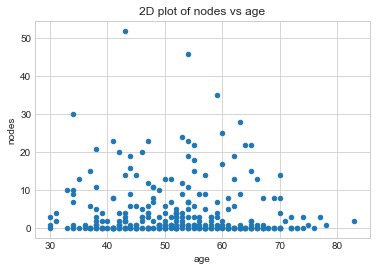

In [130]:
hbman.plot(kind='scatter', x='age', y='nodes')
plt.title('2D plot of nodes vs age')
plt.show()

Observation:
* Cannot say anything from this plot as all ages of patients with similar axillary nodes detected survived 5 years or longer as well as died before 5 years

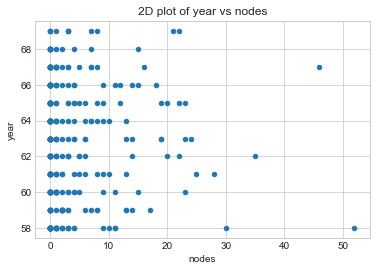

In [131]:
## pending
hbman.plot(kind='scatter', x='nodes', y='year')
plt.title('2D plot of year vs nodes')
plt.show()

Observation:
* Cannot say much as patients with similar positive axillary nodes detected in all years, were able to survive 5 years or longer as well as almost half of them died before 5 years

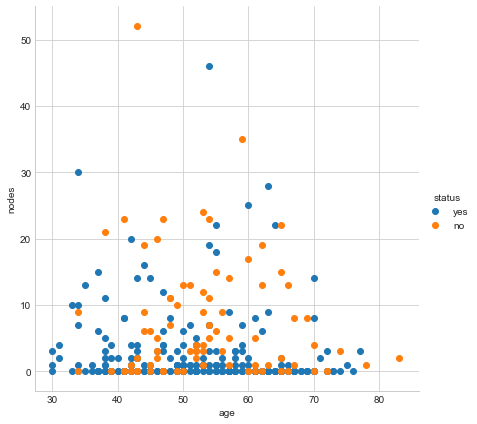

In [137]:
sns.set_style("whitegrid");
sns.FacetGrid(hbman, hue="status", size=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('')
plt.show();

Observation:
* Using age and number of nodes detected features, we are able to differentiate between survival status based on colors but we are not able to separate the data points
* From scatterplot, we can see more blue points which is of survival status in range of age < 40 and nodes < 10. It can be said survival rate is higher in this region.

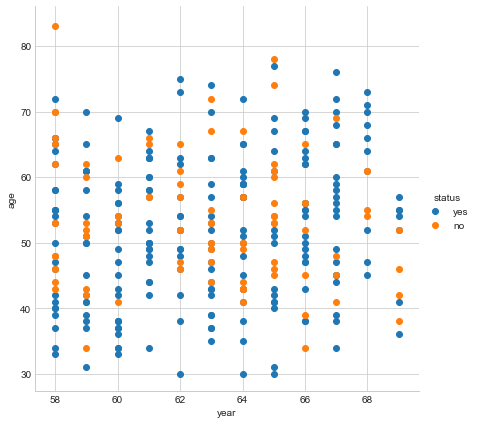

In [136]:
sns.set_style("whitegrid");
sns.FacetGrid(hbman, hue="status", size=6) \
   .map(plt.scatter, "year", "age") \
   .add_legend();
plt.title('')
plt.show();

Observation:
* It can be inferred that there are more blue points than orange points in year 60, 61, 67, and 68. It can be said that survival rate is higher in these years

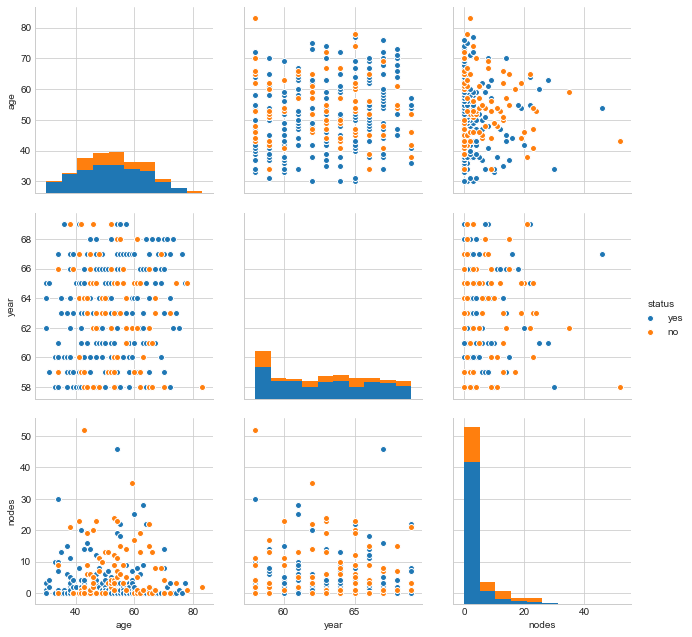

In [139]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hbman, hue="status", size=3);
plt.show()

Observation:
* In none of the plots, we could separate survival patient's data points
* The diagonal plots are PDFs for each feature

## Histogram, PDF, CDF

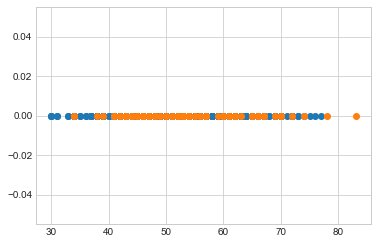

In [49]:
import numpy as np
status_yes = hbman.loc[hbman["status"] == "yes"];
status_no = hbman.loc[hbman["status"] == "no"];
#print(iris_setosa["petal_length"])
plt.plot(status_yes["age"], np.zeros_like(status_yes['age']), 'o')
plt.plot(status_no["age"], np.zeros_like(status_no['age']), 'o')
plt.show()

Observation:
* All the data points are scaled on the zero horizontal axis
* We can see few orange points on the line, but we are not sure if there are blue points beneath. Hence, we are not able to separate the data points based on this plot.

C:\Users\Pooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


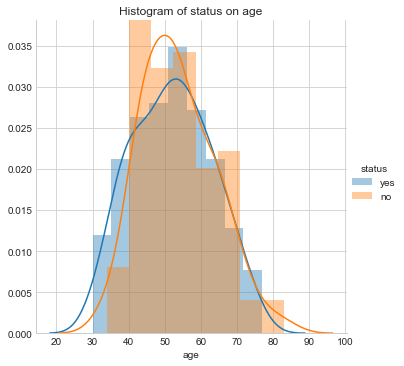

In [140]:
sns.FacetGrid(hbman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of status on age')
plt.show();

Observation:
* Based on age, it can be seen that patients between age of 40 and 60 have survived the most.

C:\Users\Pooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


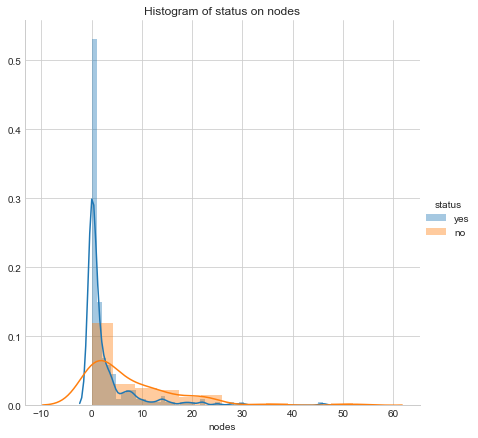

In [142]:
sns.FacetGrid(hbman, hue="status", size=6) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of status on nodes')
plt.show();

Observation:
* Based on nodes, it can be seen that patients that were detected with 0 positive axillary nodes have highest survival rate.

C:\Users\Pooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


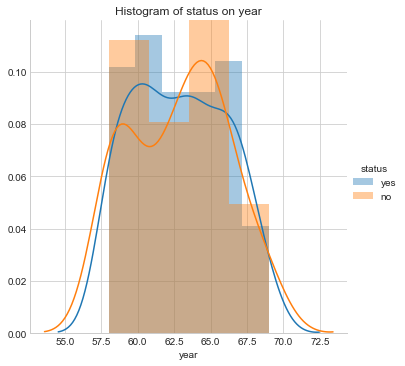

In [141]:
sns.FacetGrid(hbman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of status on year')
plt.show();

Observation:
* Based on year, it can be seen that patients survived the most in year 60
* The patients survived the least in year 63 to 66

## PDF and CDF

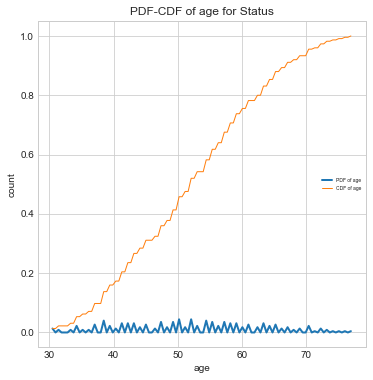

In [143]:
plt.figure(figsize=(20,6))
plt.subplot(131)
counts,bin_edges=np.histogram(status_yes["age"],bins=100,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=2.0)
plt.plot(bin_edges[1:],cdf,linewidth=1.0)
plt.xlabel('age')
plt.ylabel("count")
plt.title('PDF-CDF of age for Status')
plt.legend(['PDF of age', 'CDF of age'], loc = 5,prop={'size': 5})
plt.show()

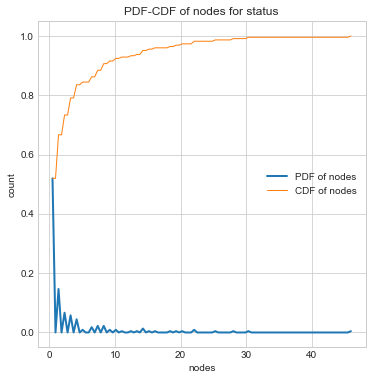

In [144]:
plt.figure(figsize=(20,6))
plt.subplot(131)
counts,bin_edges=np.histogram(status_yes['nodes'], bins=100, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=2.0)
plt.plot(bin_edges[1:],cdf,linewidth=1.0)
plt.xlabel('nodes')
plt.ylabel('count')
plt.title('PDF-CDF of nodes for status')
plt.legend(['PDF of nodes','CDF of nodes'], loc=5, prop={'size':10})
plt.show()

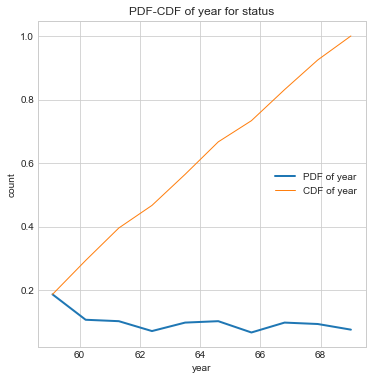

In [145]:
plt.figure(figsize=(20,6))
plt.subplot(131)
counts,bin_edges=np.histogram(status_yes['year'], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=2.0)
plt.plot(bin_edges[1:],cdf,linewidth=1.0)
plt.xlabel('year')
plt.ylabel('count')
plt.title('PDF-CDF of year for status')
plt.legend(['PDF of year','CDF of year'], loc=5, prop={'size':10})
plt.show()

Observation:
* There are majority of patients with number of detected nodes are <= 10

## Mean, Variance and Std-dev

In [103]:
print("Means:")
print(np.mean(status_yes["age"]))
print(np.mean(status_yes["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(status_yes["age"],2)));
print(np.mean(status_no["age"]))
print(np.mean(status_no["nodes"]))

print("\nStd-dev:");
print(np.std(status_yes["age"]))
print(np.std(status_yes["nodes"]))
print(np.std(status_no["age"]))
print(np.std(status_no["nodes"]))

Means:
52.01777777777778
2.7911111111111113
51.796460176991154
53.67901234567901
7.45679012345679

Std-dev:
10.98765547510051
5.857258449412131
10.10418219303131
9.128776076761632


##  Median, Percentile, Quantile, IQR, MAD

In [108]:
print("\nMedians:")
print(np.median(status_yes["age"]))
#Median with an outlier
print(np.median(np.append(status_yes["age"],50)));
print(np.median(status_no["age"]))


print("\nQuantiles:")
print(np.percentile(status_yes["age"],np.arange(0, 100, 25)))
print(np.percentile(status_no["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(status_yes["age"],90))
print(np.percentile(status_no["age"],92))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(status_yes["age"]))
print(robust.mad(status_no["age"]))


Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
68.20000000000002

Median Absolute Deviation
13.343419966550417
11.860817748044816


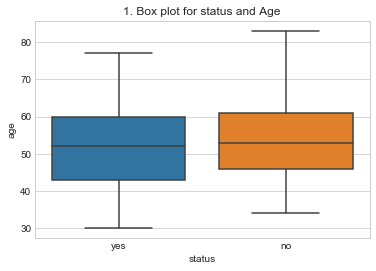

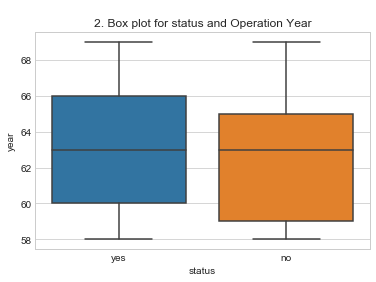

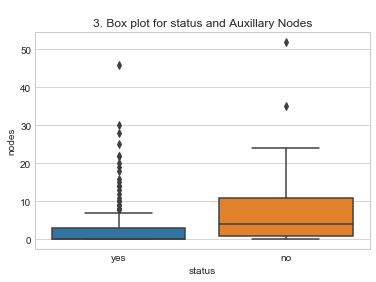

In [128]:
sns.boxplot(x = "status" , y = "age", data = hbman )
plt.title("1. Box plot for status and Age")
plt.show()

sns.boxplot(x = "status" , y = "year", data = hbman )
plt.title("\n2. Box plot for status and Operation Year")
plt.show()

sns.boxplot(x = 'status', y = 'nodes', data = hbman)
plt.title("\n3. Box plot for status and Auxillary Nodes")
plt.show()

Observation:
* In boxplot 3, it can be seen that as the number of nodes increases, the chances of dying increases.
* In boxplot 1, it can be said that there is a chance of death only for the patients of age more than 35 and there is no chance of survival for the patients with age more than 77.
* In boxplot 1, it can be inferred that the patients of age between 40 and 60 have survived the most as interquantile range exists in this range.

## Violin plots

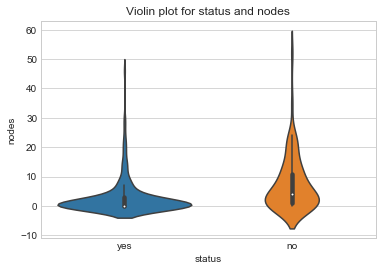

In [115]:
sns.violinplot(x="status", y="nodes", data=hbman)
plt.title('Violin plot for status and nodes')
plt.show()

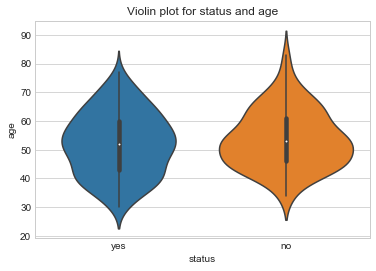

In [116]:
sns.violinplot(x='status', y='age', data=hbman)
plt.title('Violin plot for status and age')
plt.show()

Observation:
* The violin plots are similar as box plot, just has a smooth curve at the interquantile range.

## Contour Plot

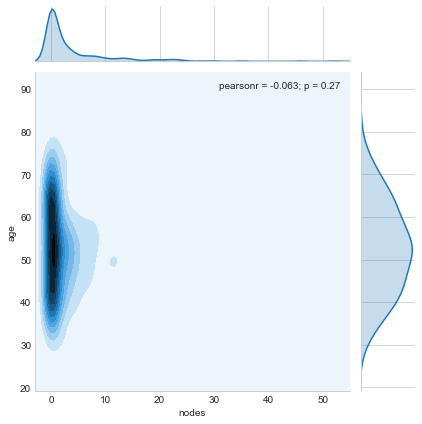

In [146]:
sns.jointplot(x='nodes', y='age', data=hbman, kind='kde')
plt.show()

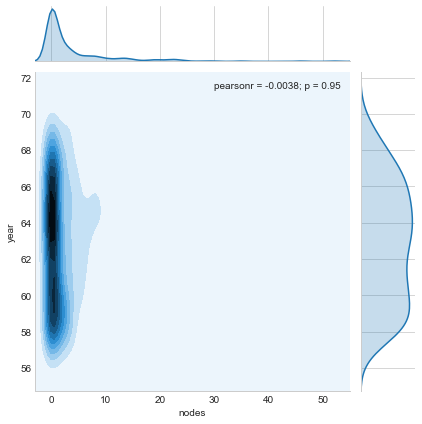

In [147]:
sns.jointplot(x='nodes', y='year', data=hbman, kind='kde')
plt.show()

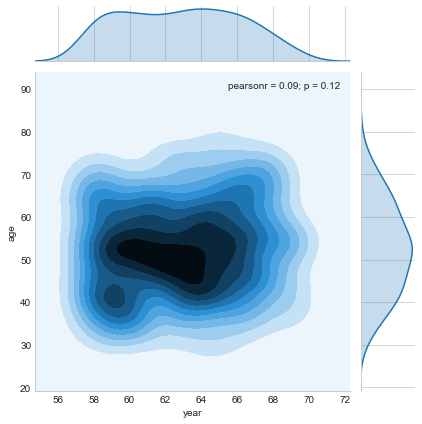

In [148]:
sns.jointplot(x='year', y='age', data=hbman, kind='kde')
plt.show()

FINAL OBSERVATIONS :

* Dataset is not balanced but there are no missing values, and hence, it is a complete dataset
* Class label 'status' is in integer form and needs to be converted into categorical values for better readability and understanding.
* Values in status are now labelled as yes & no, saying "yes" as survived and "no" as Not Survived.
* Survival rate is higher in range between age < 40 and nodes < 10
* Operation year 60, 61, 67, and 68 have more survival rate.
* Patients with age in between 40 and 60 have survived the most.
* Based on year, it can be seen that patients survived the most in year 60
* The patients survived the least in year 63 to 66
* Based on nodes, it can be seen that patients that were detected with 0 positive axillary nodes have highest survival rate.
* There are majority of patients with number of detected nodes are <= 10
* It can be said that there is a chance of death only for the patients of age more than 35 and there is no chance of survival for the patients with age more than 77.
* As the number of nodes increases, the chances of dying increases.
* We can conclude from the pairplots that data points of survival status are not separable by simply drawing a line.